In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn as nil
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from matplotlib.colors import ListedColormap
from nilearn.regions import connected_label_regions
from nilearn import plotting


pal1 = sns.color_palette("bright",n_colors=7)
pal2 = sns.color_palette("Set3",n_colors=7)
custom_pal = pal1+pal2
custom_pal_cmap = ListedColormap(sns.color_palette(custom_pal).as_hex())

In [33]:
# Preparing draw feature map
parcels = pd.read_excel("/users/hjw/data/ABCD/Parcels/Parcels.xlsx", engine="openpyxl")
gordon_labels = parcels['Community'].tolist()

parcel_order = ['Auditory','CinguloOperc','CinguloParietal','DorsalAttn','Default','FrontoParietal',
'RetrosplenialTemporal','Salience','SMhand','SMmouth','VentralAttn','Visual','None']

Gordon_label_dict = {
    key:value for (key, value) in 
    zip(parcel_order, np.arange(1,len(set(parcels['Community']))+1))
}
gordon_labels_int = [Gordon_label_dict[i] for i in gordon_labels]

In [34]:
Gordon_label_dict

{'Auditory': 1,
 'CinguloOperc': 2,
 'CinguloParietal': 3,
 'DorsalAttn': 4,
 'Default': 5,
 'FrontoParietal': 6,
 'RetrosplenialTemporal': 7,
 'Salience': 8,
 'SMhand': 9,
 'SMmouth': 10,
 'VentralAttn': 11,
 'Visual': 12,
 'None': 13}

In [57]:
gordon = "/users/hjw/data/ABCD/Parcels/Parcels_MNI_222.nii"
gordon_nib= nib.load(gordon)

In [36]:
new_gordon = np.zeros(shape=(gordon_nib.get_fdata().shape))
new_gordon.shape

(91, 109, 91, 1)

In [37]:
gordon_labeled_img, new_labels = connected_label_regions(gordon,labels=gordon_labels)
for i in range(1,334):
    new_gordon[np.where(gordon_nib.get_fdata()==i)]=gordon_labels_int[i-1]
new_gordon_img = nib.Nifti1Image(new_gordon, gordon_nib.affine)

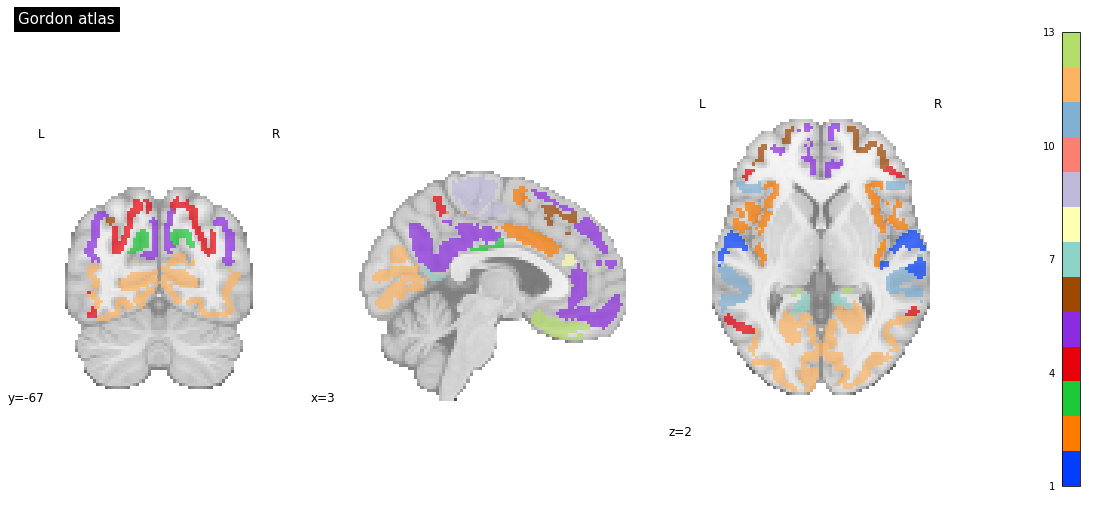

In [48]:
from nilearn import plotting
plt.figure(figsize=(15,7))
plotting.plot_roi(new_gordon_img, title="Gordon atlas",display_mode='ortho',view_type='continuous',
                  figure=1,colorbar=True,draw_cross=False,cmap=custom_pal_cmap)

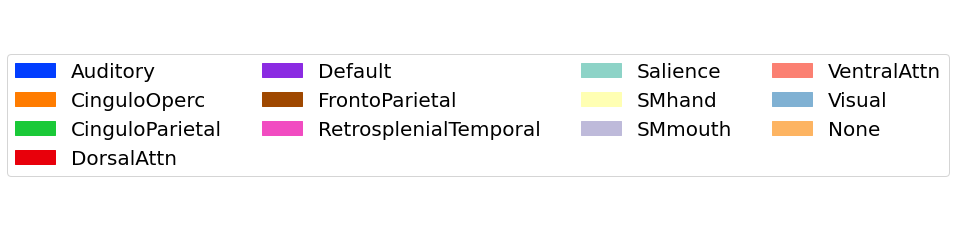

In [39]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

c = [ mpatches.Patch(color=custom_pal[i], label="{:s}".format(list(Gordon_label_dict.keys())[i]) ) for i in range(len(Gordon_label_dict)) ]
legend = plt.legend(c,Gordon_label_dict.keys(),bbox_to_anchor=(0.5, 0.5),
                    loc='center',ncol=4,labelcolor='black',prop={'size': 20},
                    handler_map={mpatches.Circle: HandlerEllipse()}).get_frame().set_facecolor('white')
plt.axis('off')
plt.show()

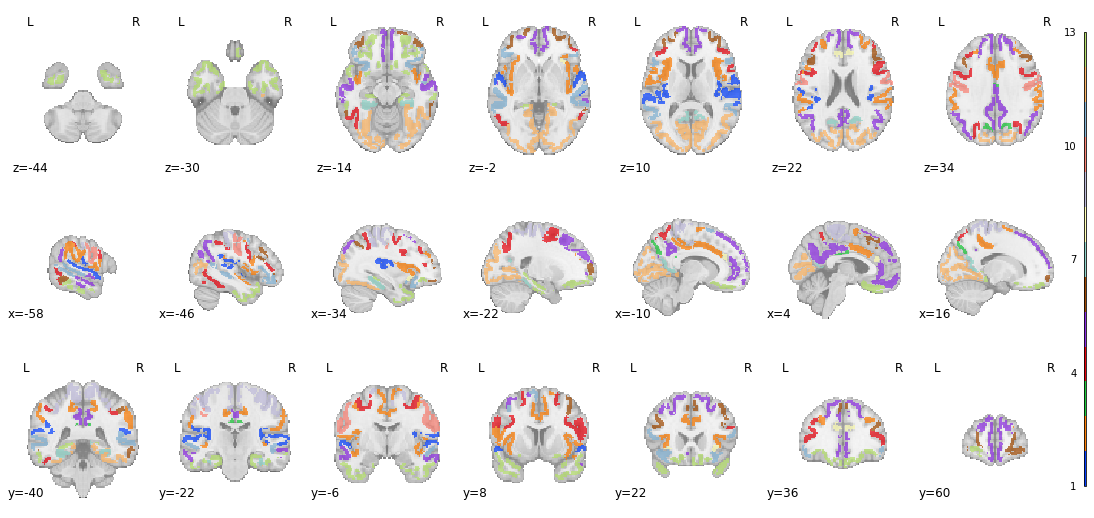

In [40]:
from nilearn import plotting
plt.figure(figsize=(15,7))
plotting.plot_roi(new_gordon_img, title="",display_mode='mosaic',view_type='continuous',
                  figure=1,colorbar=True,draw_cross=False,cmap=custom_pal_cmap)

In [186]:
# nib.save(new_gordon_img,"/users/hjd/IG_my_study/SNUH/data/gordon_labeld.nii")

In [41]:
Gordon_label_dict

{'Auditory': 1,
 'CinguloOperc': 2,
 'CinguloParietal': 3,
 'DorsalAttn': 4,
 'Default': 5,
 'FrontoParietal': 6,
 'RetrosplenialTemporal': 7,
 'Salience': 8,
 'SMhand': 9,
 'SMmouth': 10,
 'VentralAttn': 11,
 'Visual': 12,
 'None': 13}

## Set specific networks

In [53]:
net = 'VentralAttn'
new_gordon_net = new_gordon.copy()
new_gordon_net[np.where(new_gordon_net!=Gordon_label_dict[net])]=0
new_gordon_net_img = nib.Nifti1Image(new_gordon_net, gordon_nib.affine)
custom_pal_net = ListedColormap(sns.color_palette([custom_pal[Gordon_label_dict[net]-1]]).as_hex())

In [54]:
np.unique(new_gordon_net,return_counts=True)

(array([ 0., 11.]), array([899432,   3197]))

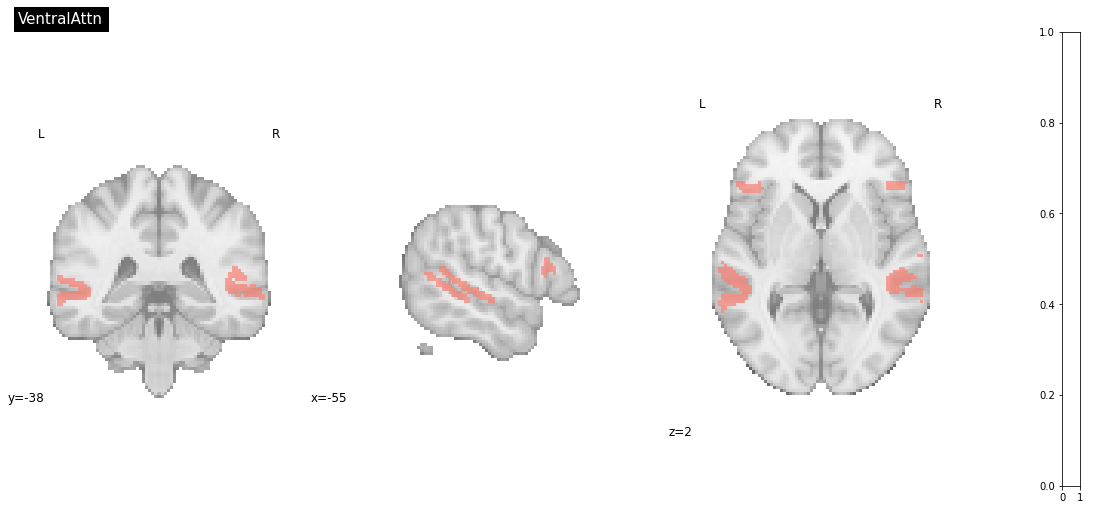

In [55]:
from nilearn import plotting
plt.figure(figsize=(15,7))
plotting.plot_roi(new_gordon_net_img, title=net,display_mode='ortho',view_type='continuous',
                  figure=1,colorbar=True,draw_cross=False,cmap=custom_pal_net)

In [191]:
# nib.save(new_gordon_net_img,f"/users/hjd/IG_my_study/SNUH/data/gordon_labeld_{net}.nii")

In [196]:
np.unique(np.array(gordon_nib.dataobj),return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [129]:
parc_path = "/data4/SNU/data/Gordon_352_parc.dlabel.nii"
parc_map_nii = nib.load(parc_path)
parc_map_arr = np.array(parc_map_nii.dataobj)
parc_map_arr.shape

(1, 91282)

In [140]:
np.unique(parc_map_arr,return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

## Cortical parcellation view

In [58]:
from nilearn import datasets

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']

# Retrieve fsaverage5 surface dataset for the plotting background. It contains
# the surface template as pial and inflated version and a sulcal depth maps
# which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])


Dataset created in /home/hjd/nilearn_data/destrieux_surface



 ...done. (1 seconds, 0 min)


Fsaverage5 pial surface of left hemisphere is at: /home/hjd/.local/lib/python3.6/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz
Fsaverage5 inflated surface of left hemisphere is at: /home/hjd/.local/lib/python3.6/site-packages/nilearn/datasets/data/fsaverage5/infl_left.gii.gz
Fsaverage5 sulcal depth map of left hemisphere is at: /home/hjd/.local/lib/python3.6/site-packages/nilearn/datasets/data/fsaverage5/sulc_left.gii.gz


 ...done. (1 seconds, 0 min)


In [64]:
fsaverage['pial_left']

'/home/hjd/.local/lib/python3.6/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz'

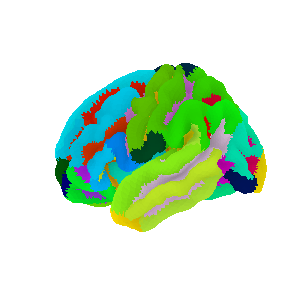

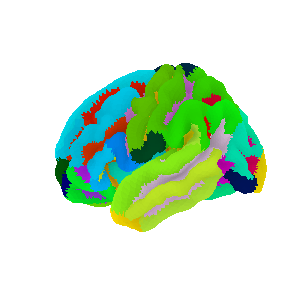

In [59]:
from nilearn import plotting

plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)